In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [ ]:
data['Genre'] = data['Genre'].map({'Male':0,'Female':1})

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
x = data[['Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(2,11):
  km = KMeans(n_clusters = i)
  km.fit(x)
  css = km.inertia_ #Wcss score
  wcss.append(css)

In [ ]:
wcss

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75427.71182424155,
 58348.641363315044,
 51458.2909741209,
 44392.11566567935,
 40646.03465605827,
 37295.80896566396]

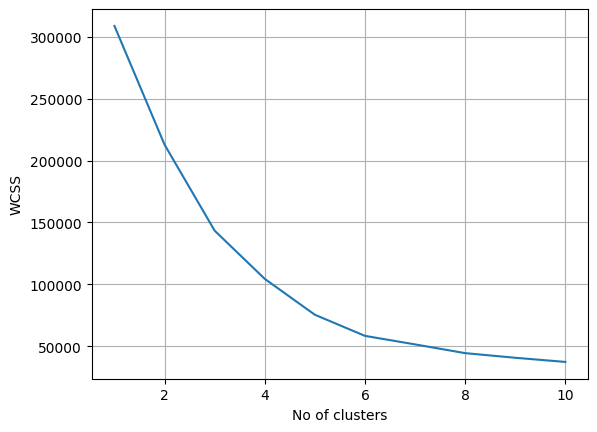

In [ ]:
plt.plot(range(2,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()

In [ ]:
km = KMeans(n_clusters = 5, n_init = 10)
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [ ]:
cluster_labels = km.predict(x)

In [ ]:
cluster_labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

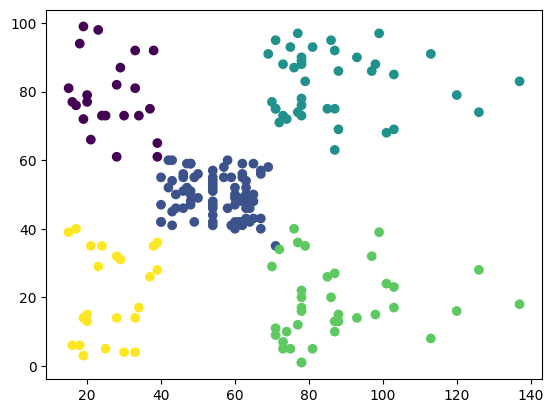

In [ ]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],
            c = cluster_labels)
plt.show()

In [ ]:
x['cluster_labels'] = cluster_labels

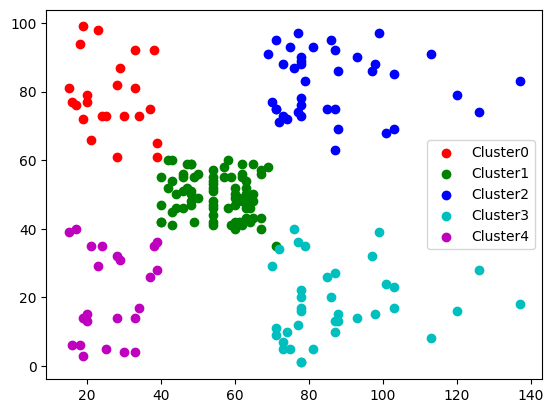

In [ ]:
colors = ['r','g','b','c','m']
for i in range(5):
  cluster_data = x[cluster_labels == i]
  plt.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              c = colors[i],
              label = f'Cluster{i}')
plt.legend()


In [ ]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18
